In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data iris.csv", delimiter=";")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## **DATA OUTLIERS**

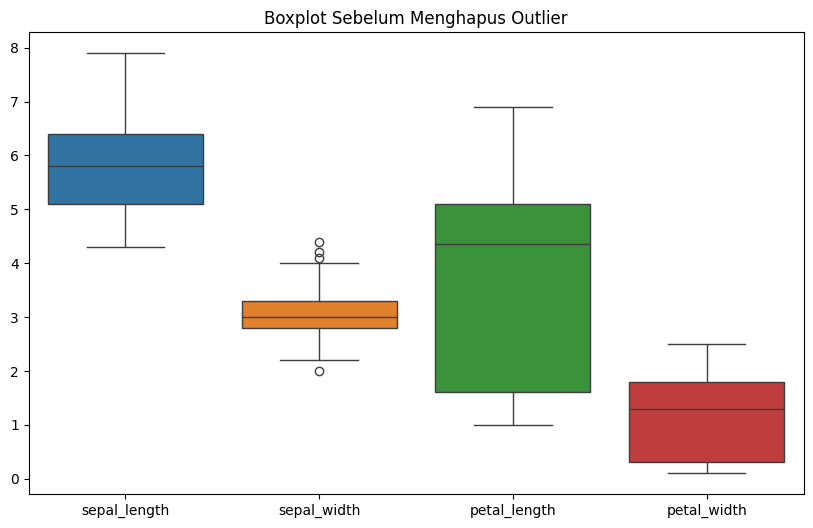

In [3]:
# Boxplot sebelum menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas kita mencoba melihat apakah **datanya ada outliers atau tidak** pada seluruh fitur. Dari hasil yang di atas, kita dapat melihat **terdapat outliers** untuk bagian **sepal_width** di bawah persegi (**lingkaran pada titik y di angka mendekati 2**) dan di atas titik y 4.

---

In [ ]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")

# Hapus outlier
df = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")


Jumlah data sebelum menghapus outlier: 150
Jumlah data setelah menghapus outlier: 146


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas, kita menggunakan metode **IQR** untuk menghilangkan outliernya. Metode ini bekerja dengan cara menghapus data yang berada di luar rentang normal, yaitu data yang berada di bawah batas bawah (lower bound) dan di atas batas atas (upper bound).

---

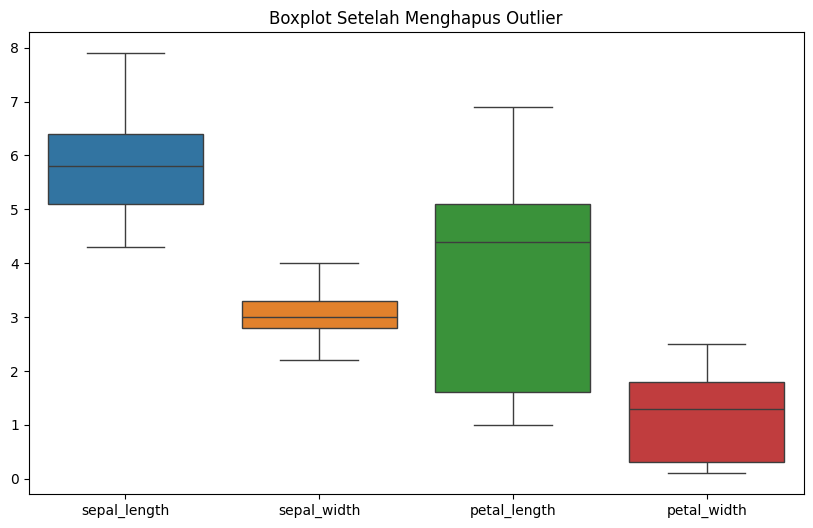

In [5]:
# Boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()


---
<center style="color:red"><b>PENJELASAN</b></center>

---

Dalam kode `sns.boxplot(data=df.iloc[:, :-1])`, kita memvisualisasikan data setelah menghapus outlier. Dari boxplot, kita dapat melihat bahwa **tidak ada lagi outlier**, yang ditandai dengan lingkaran di luar whiskers. Hal ini menunjukkan bahwa data telah bersih dan distribusinya kini lebih sesuai dengan rentang normal.

---

## **DATA DUPLIKASI**

In [6]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df[df.duplicated()]` kita mencoba melihat apakah **ada data yang terduplikasi atau tidak**. Dari hasil tersebut, kita dapat melihat kalau **ada data yang terduplikasi**. Maka kita akan masuk pada tahapan selanjutnya untuk menghilangkan data duplikasi tersebut.

---

In [7]:
df.drop_duplicates(inplace=True)
df.shape

C:\Users\dirga\AppData\Local\Temp\ipykernel_7848\3054484884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


(143, 5)

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.drop_duplicates(inplace=True)` telah menghilangkan data yang terduplikasi tersebut. kemudian pada kode `df.shape` kita dapat melihat hasil **kolom dan baris** nya menjadi `(143, 5)`.

---

<center><h2><b>DATA KOSONG</b></h2></center>

In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

---
<center style="color:red"><b>PENJELASAN</b></center>

---
dalam kode di atas `df.isna().sum()` kita akan melihat dari data tersebut apakah `ada data kosong atau tidak`. Dari hasil diatas tidak terdapat data yang kosong. Maka kita bisa lanjut ke tahapan selanjutnya. `df.isna()` artinya kita akan melihat untuk apakah suatu data itu kosong atau tidak. `.sum()` digunakan untuk menghitung berapa banyak data untuk setiap kolom yang hilang.

---

In [9]:
# import numpy as np

# class KMeans:
#     def __init__(self, n_clusters=3, max_iter=100, min_diff=1e-4, random_state=None):
#         self.n_clusters = n_clusters
#         self.max_iter = max_iter
#         self.min_diff = min_diff
#         self.random_state = random_state
#         self.centroids = None
#         self.labels = None

#     def fit(self, data):
#         np.random.seed(self.random_state)
#         # Inisialisasi centroids secara acak
#         self.centroids = self._initialize_centroids(data)
        
#         for i in range(self.max_iter):
#             # Hitung jarak ke centroid terdekat untuk setiap titik
#             distances = self._compute_distances(data, self.centroids)
#             # Tentukan label untuk setiap titik berdasarkan jarak minimum
#             new_labels = np.argmin(distances, axis=1)

#             # Cek apakah label berubah, jika tidak berarti sudah konvergen
#             if np.all(new_labels == self.labels):
#                 break
#             self.labels = new_labels

#             # Hitung centroid baru untuk setiap cluster
#             new_centroids = np.array([
#                 data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)
#             ])

#             # Cek apakah perubahan centroid sudah sangat kecil
#             diff = np.linalg.norm(self.centroids - new_centroids)
#             if diff < self.min_diff:
#                 break

#             self.centroids = new_centroids

#     def predict(self, data):
#         # Menghitung jarak ke centroid dan memberikan label terdekat
#         distances = self._compute_distances(data, self.centroids)
#         return np.argmin(distances, axis=1)

#     def _initialize_centroids(self, data):
#         # Pilih centroids secara acak dari data
#         indices = np.random.choice(data.shape[0], self.n_clusters, replace=False)
#         return data[indices]

#     def _compute_distances(self, data, centroids):
#         # Menghitung jarak Euclidean antara setiap titik data dan centroids
#         return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

#     def compute_wcss(self, data):
#         labels = self.predict(data)
#         wcss = 0
#         for i in range(self.n_clusters):
#             cluster_data = data[labels == i]
#             cluster_centroid = self.centroids[i]
#             wcss += np.sum(np.linalg.norm(cluster_data - cluster_centroid, axis=1) ** 2)
#         return wcss

In [10]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, min_diff=1e-4, random_state=None,verbose=False):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.min_diff = min_diff
        self.random_state = random_state
        self.centroids = None
        self.verbose = verbose

    def fit(self, data):
        np.random.seed(self.random_state)
        self.centroids = self._initialize_centroids(data)
        
        # Menampilkan centroid awal
        # print("Centroid Awal:")
        # print(self.centroids)
        if self.verbose:
            # Menampilkan centroid awal
            print("Centroid Awal :")
            print(self.centroids)

        for iteration in range(self.max_iter):
            distances = self._compute_distances(data, self.centroids)
            labels = np.argmin(distances, axis=1)

            # Update centroids
            new_centroids = np.copy(self.centroids)
            for i in range(self.n_clusters):
                cluster_data = data[labels == i]
                if len(cluster_data) > 0:
                    new_centroids[i] = cluster_data.mean(axis=0)
                # Jika cluster kosong, biarkan centroid tetap sama atau pilih acak titik
                else:
                    new_centroids[i] = data[np.random.choice(data.shape[0])]

            diff = np.linalg.norm(self.centroids - new_centroids)
            self.centroids = new_centroids

            # Jika verbose=True, tampilkan hasil iterasi
            if self.verbose:
                print(f"Iteration {iteration + 1}")
                print(f"Centroids:\n{self.centroids}")
                print(f"Difference: {diff}")

            # Jika perubahan centroid sudah cukup kecil, hentikan iterasi
            if diff < self.min_diff:
                if self.verbose:
                    print(f"Converged after {iteration + 1} iterations.")
                break

    def predict(self, data):
        distances = self._compute_distances(data, self.centroids)
        return np.argmin(distances, axis=1)

    def _initialize_centroids(self, data):
        # Mendapatkan nilai min dan max untuk setiap fitur
        min_vals = np.min(data, axis=0)
        max_vals = np.max(data, axis=0)

        # Inisialisasi centroid dengan memilih acak di dalam rentang nilai min dan max untuk setiap fitur
        centroids = np.random.rand(self.n_clusters, data.shape[1]) * (max_vals - min_vals) + min_vals
        
        return centroids

    def _compute_distances(self, data, centroids):
        return np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)

    def compute_wcss(self, data):
        labels = self.predict(data)
        wcss = 0
        for i in range(self.n_clusters):
            cluster_data = data[labels == i]
            cluster_centroid = self.centroids[i]
            wcss += np.sum(np.linalg.norm(cluster_data - cluster_centroid, axis=1) ** 2)
        return wcss

In [11]:
# Mengambil kolom tertentu untuk clustering
data = df[['sepal_length', 'petal_length']].values


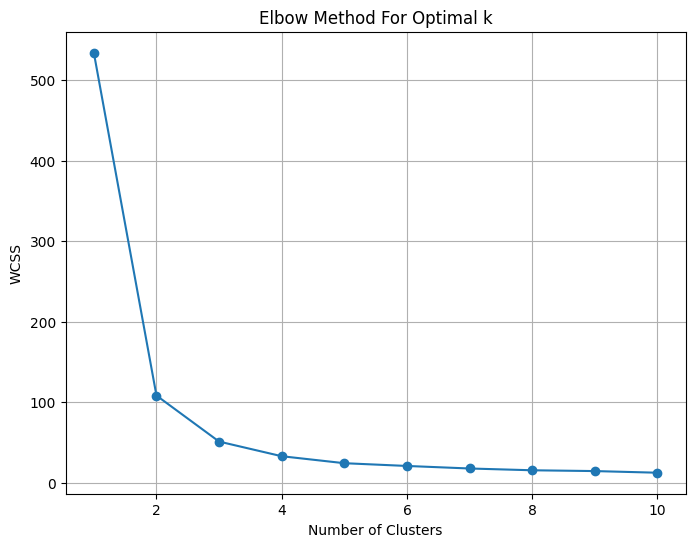

In [12]:
# Menyimpan nilai WCSS untuk setiap jumlah cluster
wcss = []

# Melakukan KMeans untuk cluster 1 sampai 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=100, min_diff=1e-4, random_state=42, verbose=False)
    kmeans.fit(data)
    wcss.append(kmeans.compute_wcss(data))

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [13]:
# Inisialisasi dan fit dengan KMeans manual
kmeans_manual = KMeans(n_clusters=3, max_iter=100, min_diff=1e-4, random_state=42,verbose=True)
kmeans_manual.fit(data)

Centroid Awal :
[[5.64834443 6.60921441]
 [6.93517819 4.53208506]
 [4.86166711 1.92036767]]
Iteration 1
Centroids:
[[6.93636364 6.15454545]
 [6.23928571 4.81785714]
 [4.98125    1.57083333]]
Difference: 1.6025366402592476
Iteration 2
Centroids:
[[7.0625     5.99583333]
 [6.06901408 4.62676056]
 [4.98125    1.57083333]]
Difference: 0.3265122512958691
Iteration 3
Centroids:
[[6.96206897 5.90344828]
 [6.02238806 4.54477612]
 [4.98085106 1.53404255]]
Difference: 0.16991335270717683
Iteration 4
Centroids:
[[6.89393939 5.83636364]
 [5.98125    4.475     ]
 [4.9826087  1.49565217]]
Difference: 0.13107228793961453
Iteration 5
Centroids:
[[6.85945946 5.75945946]
 [5.94166667 4.43166667]
 [4.9826087  1.49565217]]
Difference: 0.10270217311529975
Iteration 6
Centroids:
[[6.85384615 5.71538462]
 [5.9137931  4.41551724]
 [4.9826087  1.49565217]]
Difference: 0.05488023818945778
Iteration 7
Centroids:
[[6.8525     5.6925    ]
 [5.89824561 4.40877193]
 [4.9826087  1.49565217]]
Difference: 0.02850861986

In [14]:
# Hasil label cluster
labels_manual = kmeans_manual.predict(data)
centroids_manual = kmeans_manual.centroids

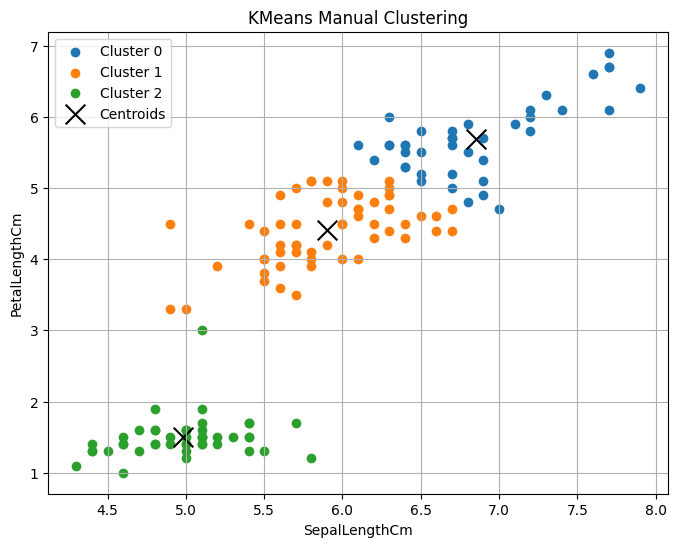

In [15]:
# Visualisasi hasil manual
plt.figure(figsize=(8, 6))
for i in range(kmeans_manual.n_clusters):
    cluster_points = data[labels_manual == i]  # Data tiap cluster
    plt.scatter(                        
        cluster_points[:, 0], 
        cluster_points[:, 1], 
        label=f'Cluster {i}'
    )
# Plot centroid
plt.scatter(
    centroids_manual[:, 0], 
    centroids_manual[:, 1], 
    s=200, c='black', marker='x', label='Centroids'
)
plt.title('KMeans Manual Clustering')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Contoh prediksi untuk data baru
new_data = np.array([[5.1, 3.5], [6.0, 3.0]])
predictions = kmeans_manual.predict(new_data)
print(predictions)


[1 1]
